**LOADING THE DATA**

In [67]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [68]:
df.shape

(918, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [70]:
df.duplicated().sum()

0

In [71]:
df[df['Cholesterol'] == 0]
df[df["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [72]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**FILL MISSING VALUES WITH ITERATIVE IMPUTER**

In [73]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df["Cholesterol"] = df["Cholesterol"].replace(0,np.nan)
imputer = IterativeImputer(max_iter=10)
imputed_column = imputer.fit_transform(df[['Cholesterol']])
df['Cholesterol'] = imputed_column


In [74]:
df["RestingBP"] = df["RestingBP"].replace(0,np.nan)
imputer = IterativeImputer(max_iter=10)
imputed_column1= imputer.fit_transform(df[['RestingBP']])
df['RestingBP'] = imputed_column1
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0        289.0          0     Normal   
1     49   F           NAP      160.0        180.0          0     Normal   
2     37   M           ATA      130.0        283.0          0         ST   
3     48   F           ASY      138.0        214.0          0     Normal   
4     54   M           NAP      150.0        195.0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA      110.0        264.0          0     Normal   
914   68   M           ASY      144.0        193.0          1     Normal   
915   57   M           ASY      130.0        131.0          0     Normal   
916   57   F           ATA      130.0        236.0          0        LVH   
917   38   M           NAP      138.0        175.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.000000,60.0,77.0
RestingBP,918.0,132.540894,17.989932,80.0,120.0,130.000000,140.0,200.0
Cholesterol,918.0,244.635389,53.318029,85.0,214.0,244.635389,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.000000,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.000000,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.0,0.600000,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.0,1.000000,1.0,1.0


**PAIRPLOT JUST TO SEE SCATTER PLOT AND DETECT SOME OUTLIERS**

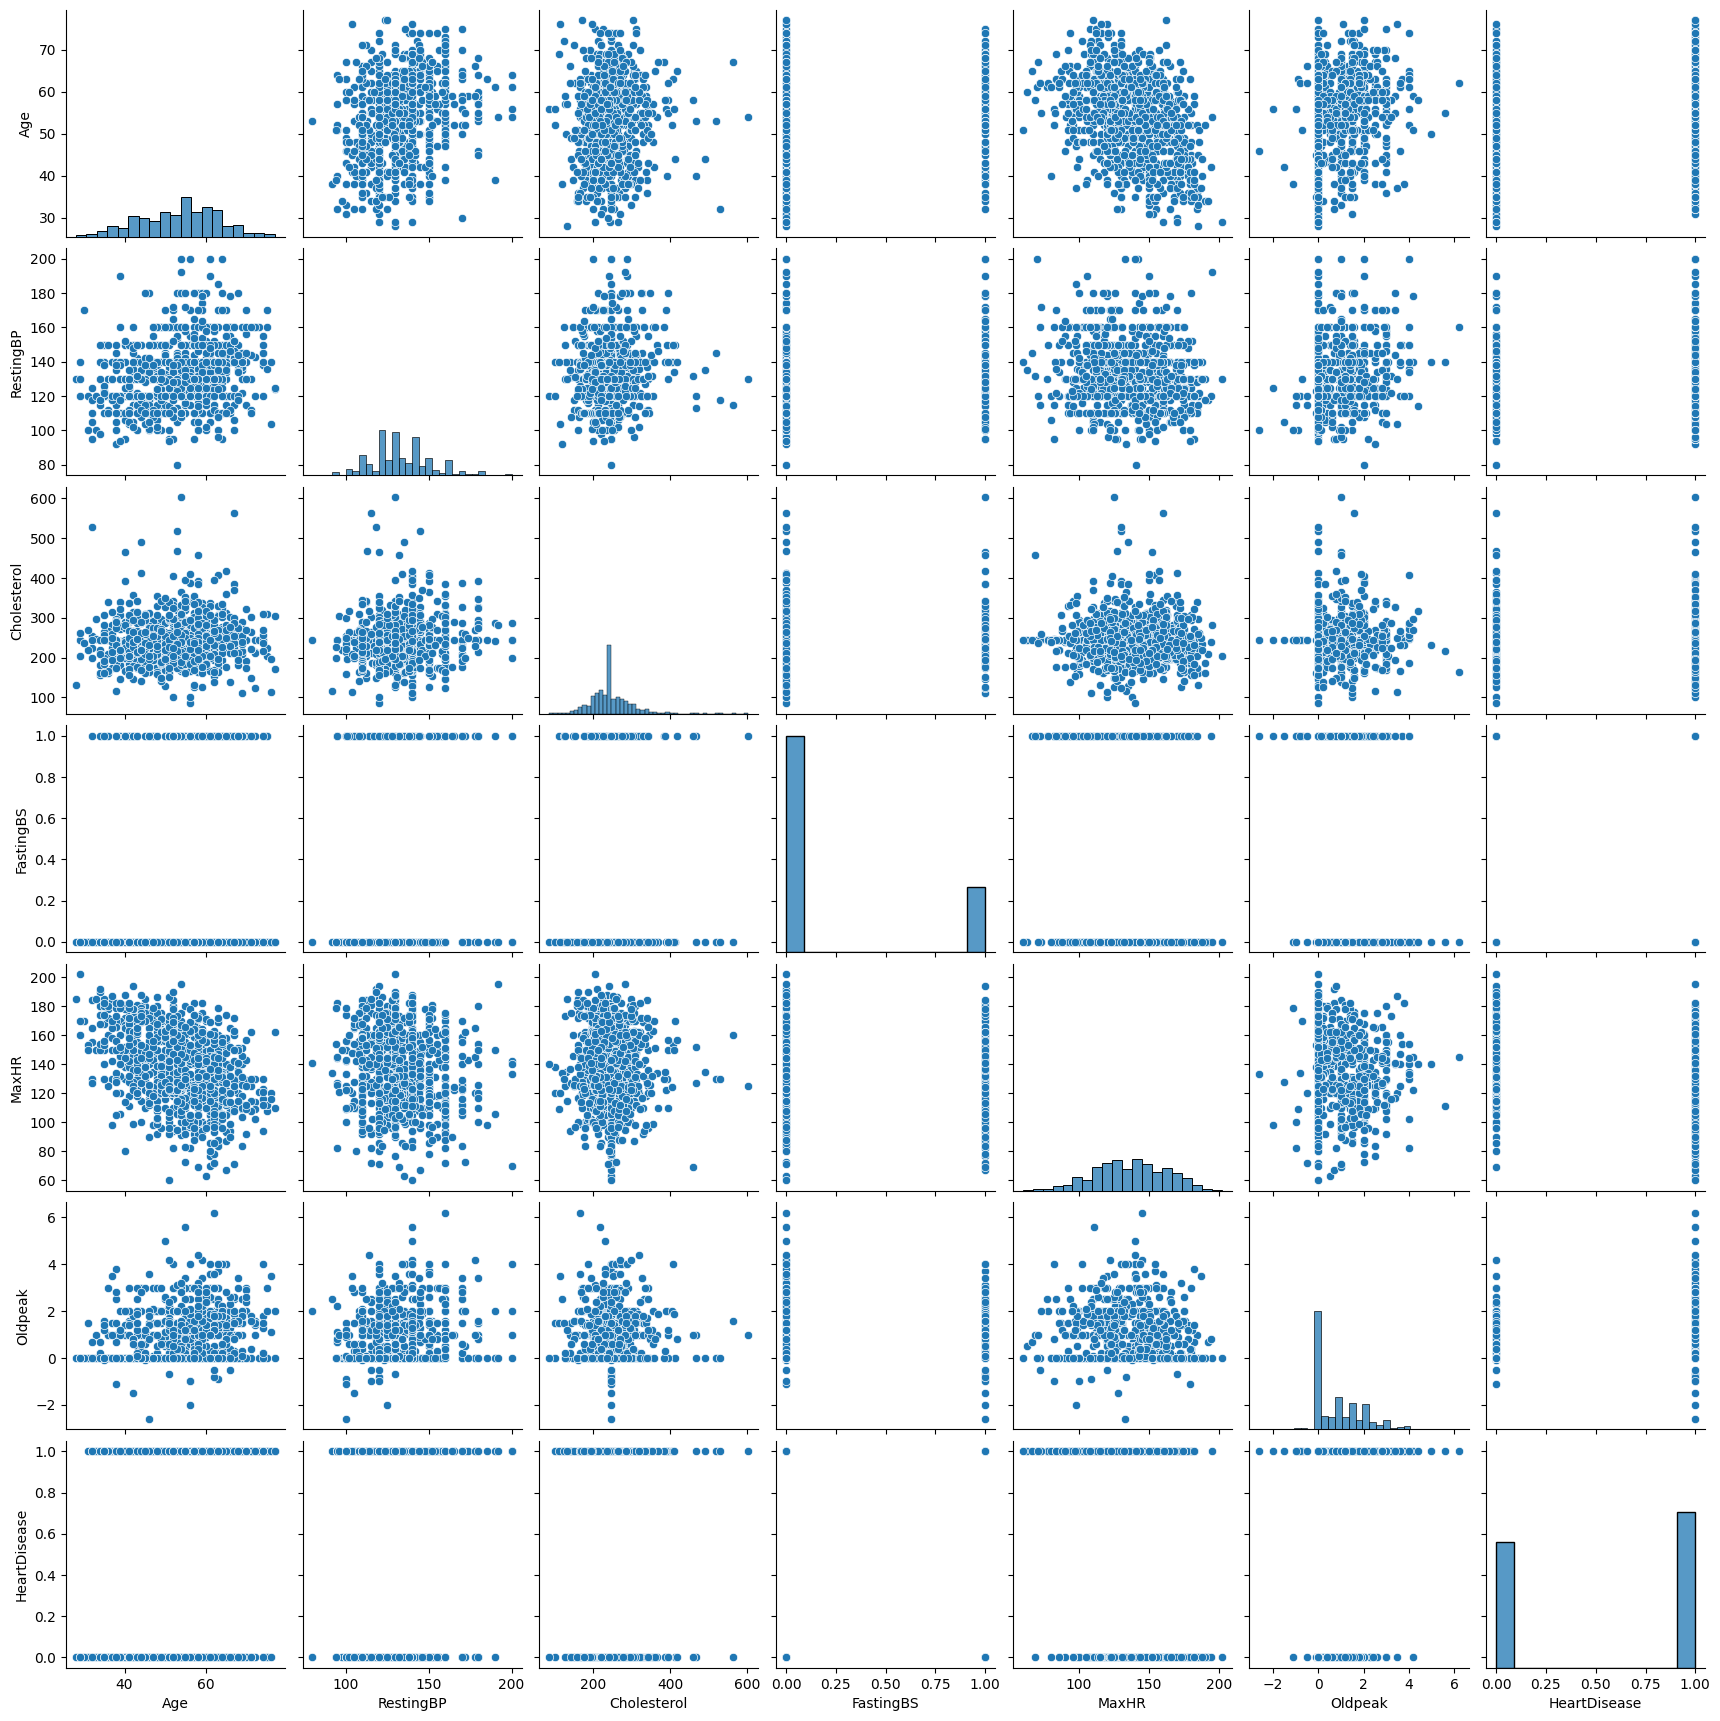

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


**SOME EXPLORATORY DATA ANALYSIS FOR CATEGORICAL COLUMNS**

M    725
F    193
Name: Sex, dtype: int64


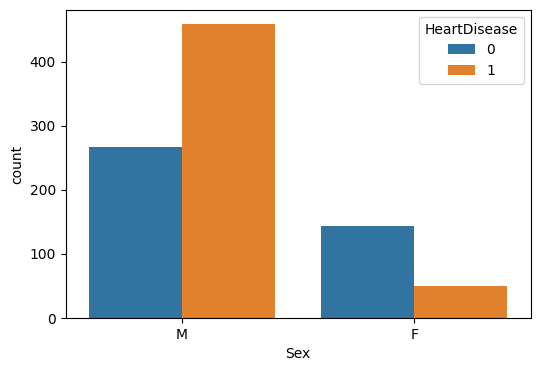

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


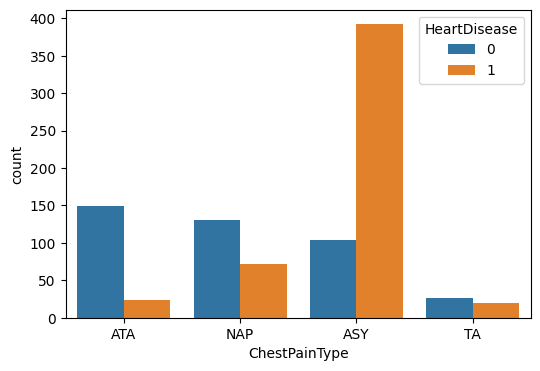

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


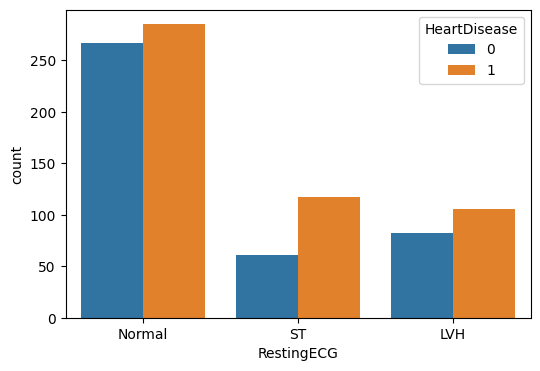

N    547
Y    371
Name: ExerciseAngina, dtype: int64


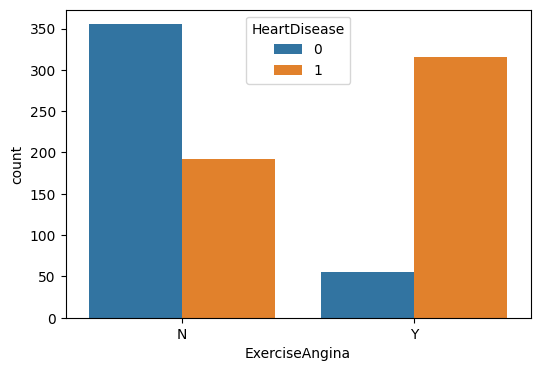

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


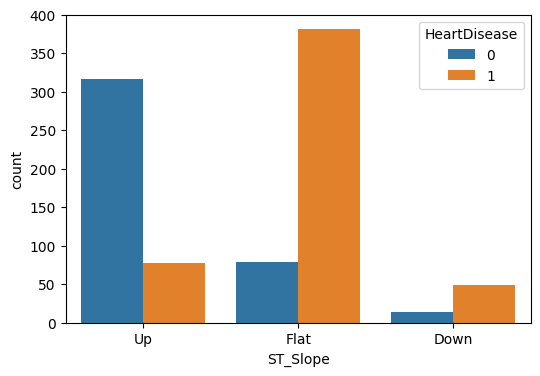

In [77]:

cat_cols = [col for col, dtype in df.dtypes.items() if dtype in ["object"]]
for col in cat_cols:
    print(df[col].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(x = df[col],hue = df["HeartDisease"] ,data = df)
    plt.show()

#### **SOME INSIGHTS FROM THE ABOVE GRAPHS :**
### Sex:
Males have a higher chance for a Heart Disease.
### ChestPainType :
Many patients that had a heart disease were ASY ,meaning asymptomatic , it is possible they had a sudden heart attack.
### RestingECG:
Majority of the patients have a normal resting ECG.
### ExerciseAngina:
Most patients did not have Exercise Angina but for those that did , they had more chance of Heart Disease.
### ST_Slope:
A considerable number of patients with flat-sloping and down-sloping ST segment depression have heart disease.




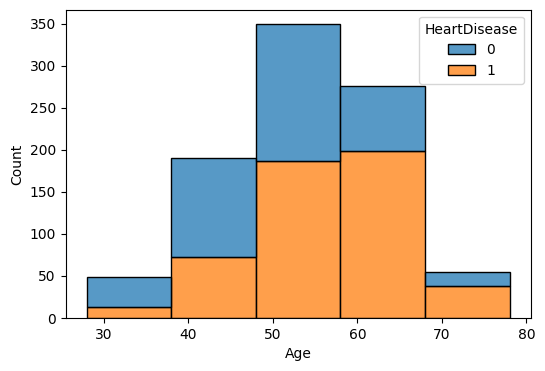

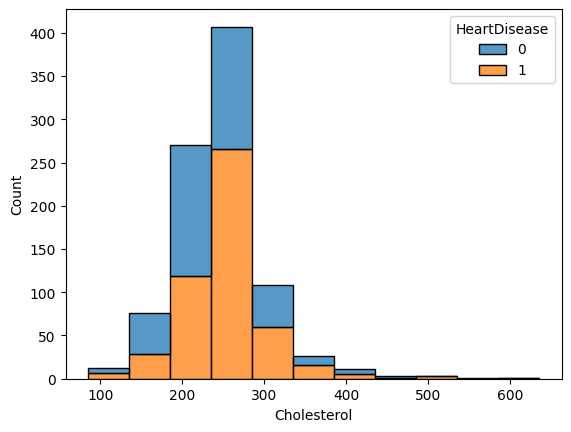

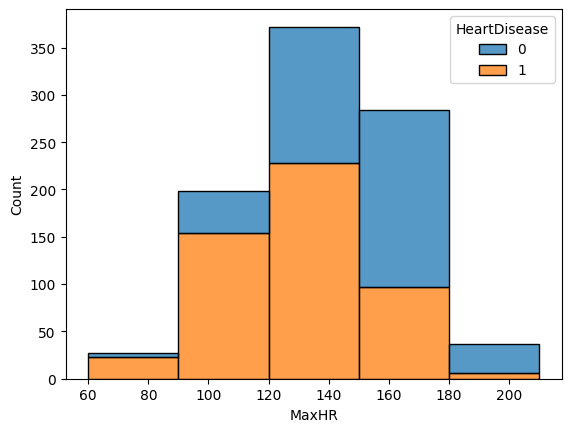

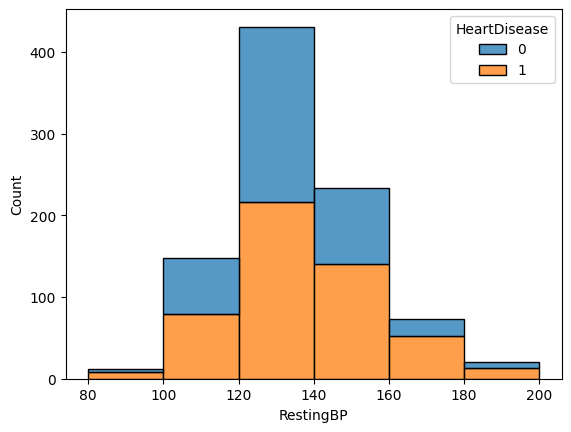

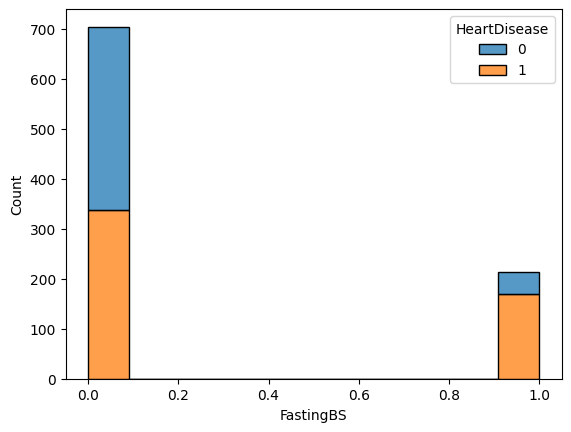

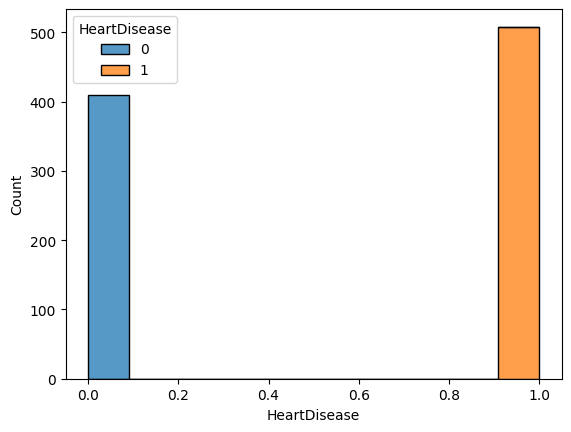

In [78]:
plt.figure(figsize=(6, 4)) 
sns.histplot(x = df["Age"],binwidth=10,hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()
sns.histplot(x = df["Cholesterol"],binwidth=50,hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()
sns.histplot(x = df["MaxHR"],binwidth=30,hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()
sns.histplot(x = df["RestingBP"],binwidth=20,hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()
sns.histplot(x = df["FastingBS"],hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()
sns.histplot(x = df["HeartDisease"],hue = df["HeartDisease"] ,data = df,multiple= "stack")
plt.show()


### **Correlation Heatmap to Select Relevant Features**

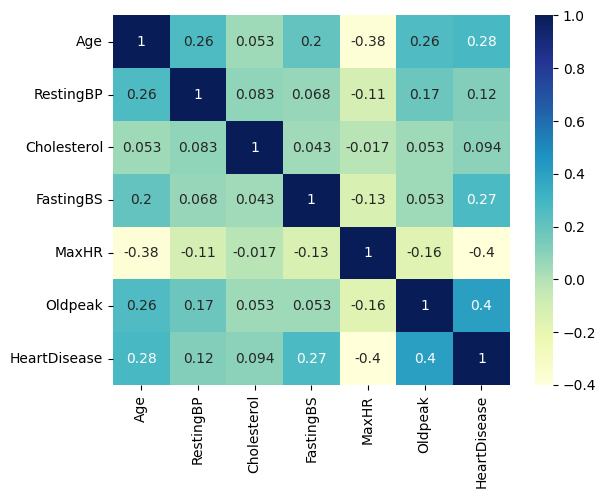

In [79]:
import matplotlib.pyplot as mp
import seaborn as sns
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
mp.show()


### **Removing Features with Lower Correlation**

In [80]:
df.drop(['Cholesterol', 'RestingBP'], axis=1, inplace=True)


### **Removing Outliers using Inter Quartile Ranges**

In [81]:
import pandas as pd
import numpy as np
numerical_columns = [col for col, dtype in df.dtypes.items() if dtype in ['int64', 'float64'] and col not in ("HeartDisease","FastingBS")] 
outliers_replaced_count = {}
for column_name in numerical_columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outliers = df[(df[column_name] < Q1 - threshold) | (df[column_name] > Q3 + threshold)]
    print("Outliers in column '{}':".format(column_name))
    print(outliers)
    outliers_count = outliers.shape[0]
    outliers_replaced_count[column_name] = outliers_count
    mean_value = df[column_name].mean()
    df.loc[(df[column_name] < Q1 - threshold) | (df[column_name] > Q3 + threshold), column_name] = mean_value
print("Outliers Replaced:")
print(outliers_replaced_count)


Outliers in column 'Age':
Empty DataFrame
Columns: [Age, Sex, ChestPainType, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Outliers in column 'MaxHR':
      Age Sex ChestPainType  FastingBS RestingECG  MaxHR ExerciseAngina  \
370  60.0   M           ASY          0     Normal     63              Y   
390  51.0   M           ASY          0     Normal     60              N   

     Oldpeak ST_Slope  HeartDisease  
370      0.5       Up             1  
390      0.0     Flat             1  
Outliers in column 'Oldpeak':
      Age Sex ChestPainType  FastingBS RestingECG  MaxHR ExerciseAngina  \
68   52.0   M           ASY          0         ST   82.0              Y   
166  50.0   M           ASY          0         ST  140.0              Y   
324  46.0   M           ASY          1         ST  133.0              N   
500  65.0   M           ASY          0     Normal  140.0              Y   
521  61.0   M           ASY          0         ST  135.0     

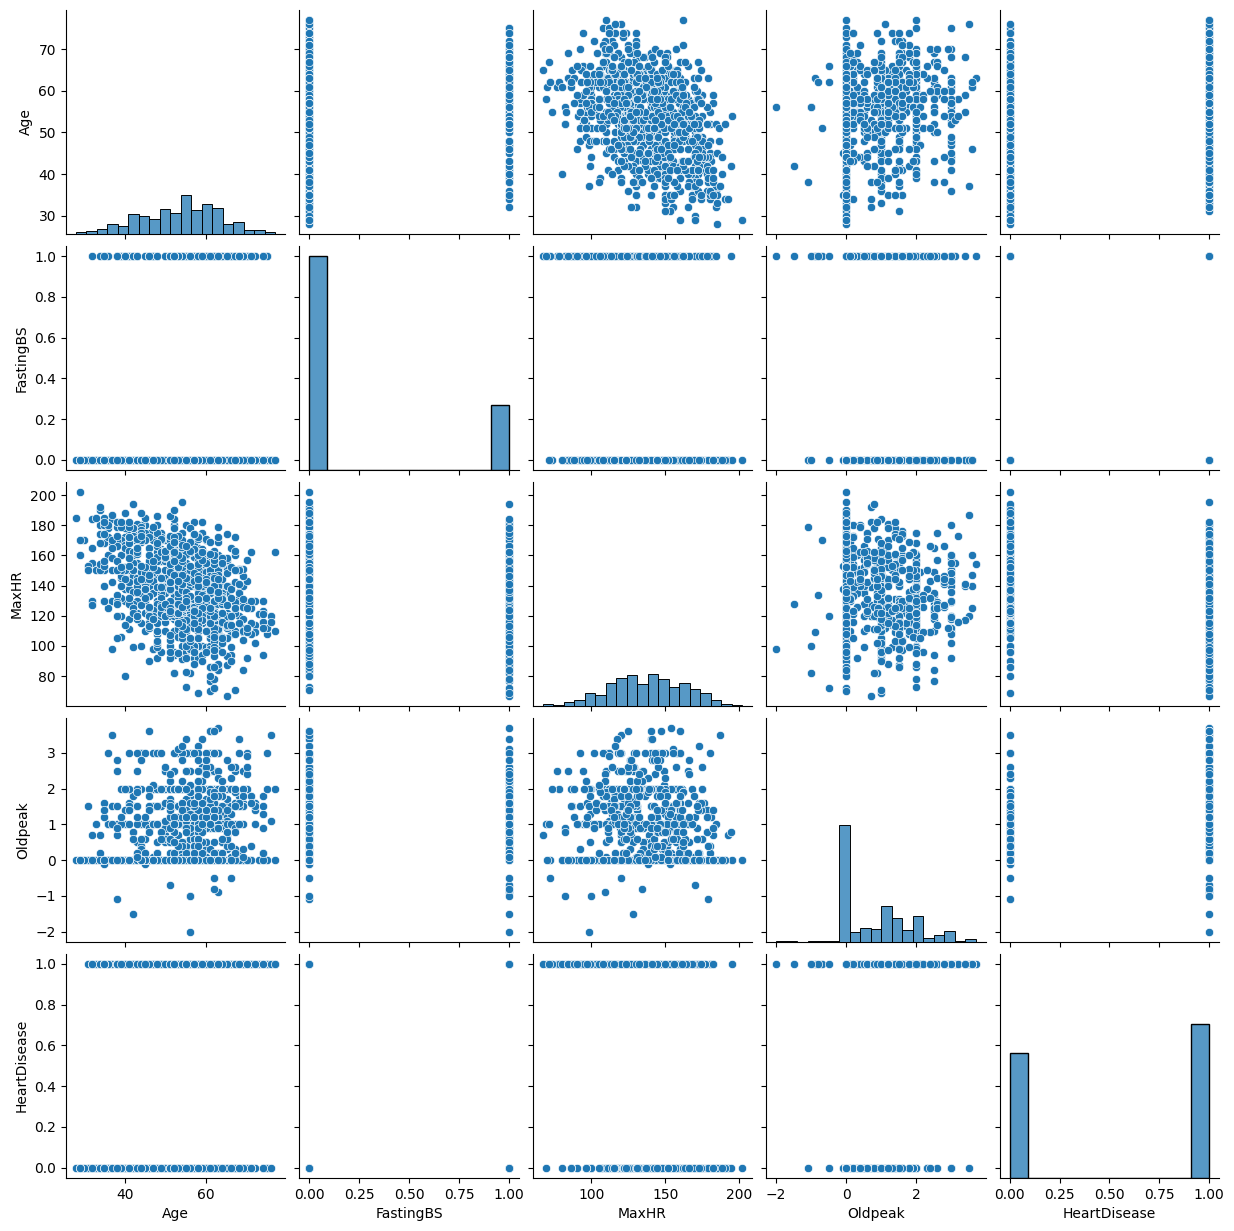

In [82]:
sns.pairplot(df)
plt.show()

#### **Calculating Feature Importances**

          Feature  Importance
8        ST_Slope    0.228893
2           MaxHR    0.129772
3         Oldpeak    0.129486
5   ChestPainType    0.124676
7  ExerciseAngina    0.122431
0             Age    0.114530
4             Sex    0.054415
1       FastingBS    0.049893
6      RestingECG    0.045903


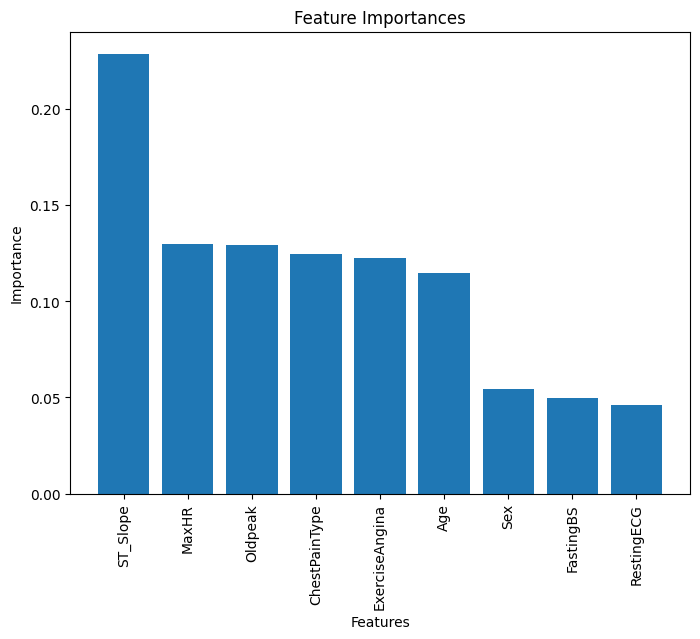

In [83]:


import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
categorical_features = X.select_dtypes(include=object)
lb = LabelEncoder()
X_categorical_encoded = categorical_features.apply(lb.fit_transform)
X_encoded = pd.concat([X.select_dtypes(include=[float, int]), X_categorical_encoded], axis=1)
model = ExtraTreesClassifier()
model.fit(X_encoded, y)
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)
X_encoded.head()
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances_df)), feature_importances_df['Importance'])
plt.xticks(range(len(feature_importances_df)), feature_importances_df['Feature'], rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Feature Importances')
plt.show()

In [84]:
selected_features = [col for col in X_encoded.columns]
new_df = X_encoded.loc[:,selected_features]
all_df = pd.concat([new_df,df["HeartDisease"]],axis=1)
all_df.head()

,Age,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40.0,0,172.0,0.0,1,1,1,0,2,0
1,49.0,0,156.0,1.0,0,2,1,0,1,1
2,37.0,0,98.0,0.0,1,1,2,0,2,0
3,48.0,0,108.0,1.5,0,0,1,1,1,1
4,54.0,0,122.0,0.0,1,2,1,0,2,0


In [85]:
all_df.head()

,Age,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40.0,0,172.0,0.0,1,1,1,0,2,0
1,49.0,0,156.0,1.0,0,2,1,0,1,1
2,37.0,0,98.0,0.0,1,1,2,0,2,0
3,48.0,0,108.0,1.5,0,0,1,1,1,1
4,54.0,0,122.0,0.0,1,2,1,0,2,0


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age', 'MaxHR','Oldpeak','RestingECG',]
scaler = StandardScaler()
all_df[columns_to_scale] = scaler.fit_transform(all_df[columns_to_scale])
print(all_df)

          Age  FastingBS     MaxHR   Oldpeak  Sex  ChestPainType  RestingECG  \
0   -1.433140          0  1.389839 -0.871889    1              1    0.017255   
1   -0.478484          0  0.754966  0.173015    0              2    0.017255   
2   -1.751359          0 -1.546450 -0.871889    1              1    1.601219   
3   -0.584556          0 -1.149654  0.695467    0              0    0.017255   
4    0.051881          0 -0.594140 -0.871889    1              2    0.017255   
..        ...        ...       ...       ...  ...            ...         ...   
913 -0.902775          0 -0.197344  0.381996    1              3    0.017255   
914  1.536902          1  0.159772  2.680785    1              0    0.017255   
915  0.370100          0 -0.871897  0.381996    1              0    0.017255   
916  0.370100          0  1.469199 -0.871889    0              1   -1.566710   
917 -1.645286          0  1.429519 -0.871889    1              2    0.017255   

     ExerciseAngina  ST_Slope  HeartDis

In [87]:
all_df.head()

,Age,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,-1.433140,0,1.389839,-0.871889,1,1,0.017255,0,2,0
1,-0.478484,0,0.754966,0.173015,0,2,0.017255,0,1,1
2,-1.751359,0,-1.546450,-0.871889,1,1,1.601219,0,2,0
3,-0.584556,0,-1.149654,0.695467,0,0,0.017255,1,1,1
4,0.051881,0,-0.594140,-0.871889,1,2,0.017255,0,2,0


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
from sklearn.model_selection import train_test_split
X = all_df.drop("HeartDisease",axis =1)
X.head
y = all_df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)
precision = precision_score(y_test, y_pred)
print("Accuracy : ",precision)
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy :  0.8152173913043478
Accuracy :  0.826530612244898
F1-Score: 0.826530612244898
Recall: 0.826530612244898


In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy1)
precision1 = precision_score(y_test, y_pred)
print("Accuracy : ",precision1)
f1_1 = f1_score(y_test, y_pred)
print("F1-Score:", f1_1)
recall_1 = recall_score(y_test, y_pred)
print("Recall:", recall_1)

Accuracy :  0.8097826086956522
Accuracy :  0.8247422680412371
F1-Score: 0.8205128205128205
Recall: 0.8163265306122449


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy2)
precision2 = precision_score(y_test, y_pred)
print("Accuracy : ",precision2)
f1_2 = f1_score(y_test, y_pred)
print("F1-Score:", f1_2)
recall_2 = recall_score(y_test, y_pred)
print("Recall:", recall_2)


Accuracy: 0.8260869565217391
Accuracy :  0.8260869565217391
Accuracy :  0.851063829787234
F1-Score: 0.8333333333333334
Recall: 0.8163265306122449


In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy3)
precision3 = precision_score(y_test, y_pred)
print("Accuracy : ",precision3)
f1_3 = f1_score(y_test, y_pred)
print("F1-Score:", f1_3)
recall_3 = recall_score(y_test, y_pred)
print("Recall:", recall_3)

Accuracy :  0.8206521739130435
Accuracy :  0.8282828282828283
F1-Score: 0.8324873096446701
Recall: 0.8367346938775511


In [92]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy4)
precision4 = precision_score(y_test, y_pred)
print("Accuracy : ",precision4)
f1_4 = f1_score(y_test, y_pred)
print("F1-Score:", f1_4)
recall_4 = recall_score(y_test, y_pred)
print("Recall:", recall_4)

Accuracy :  0.8586956521739131
Accuracy :  0.8461538461538461
F1-Score: 0.8712871287128713
Recall: 0.8979591836734694


In [93]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy5)
precision5 = precision_score(y_test, y_pred)
print("Accuracy : ",precision5)
f1_5 = f1_score(y_test, y_pred)
print("F1-Score:", f1_5)
recall_5 = recall_score(y_test, y_pred)
print("Recall:", recall_5)

Accuracy :  0.8206521739130435
Accuracy :  0.8217821782178217
F1-Score: 0.8341708542713568
Recall: 0.8469387755102041


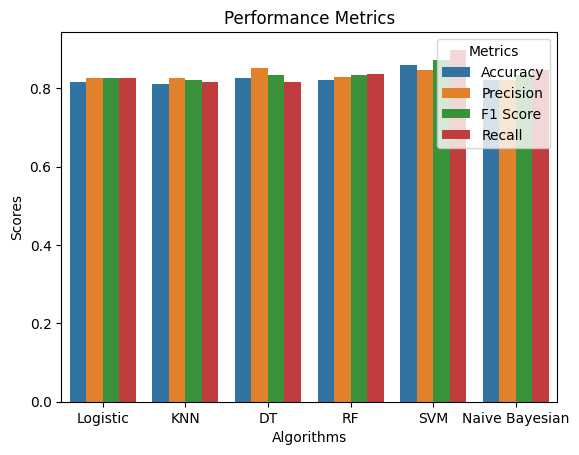

In [94]:

algorithms = ['Logistic', 'KNN', 'DT', 'RF', 'SVM', 'Naive Bayesian']
accuracy_values = [accuracy, accuracy1,accuracy2, accuracy3, accuracy4, accuracy5]
precision_values = [precision,precision1, precision2, precision3, precision4, precision5]
f1_values = [f1,f1_1, f1_2, f1_3, f1_4, f1_5]
recall_values = [recall,recall_1, recall_2, recall_3, recall_4, recall_5]
data = {'Algorithm': algorithms, 'Accuracy': accuracy_values, 'Precision': precision_values, 'F1 Score': f1_values, 'Recall': recall_values}
df = pd.DataFrame(data)
sns.barplot(x='Algorithm', y='Scores', hue='Metrics', data=pd.melt(df, id_vars='Algorithm', var_name='Metrics', value_name='Scores'))
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.show()